In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
data = {
    'State/Union Territory': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'NCT of Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'ALL INDIA'],
    '2004': [5377.8, 135.0, 3470.7, 2472.2, 4383.3, 14.3, 145.2, 1238.2, 3023.0, 122.0, 492.2, 1677.0, 3547.0, 667.1, 1169.0, 2164.0, 435.9, 193.7, 104.1, 259.8, 6466.0, 65.7, 10437.0, 150.4, 21.6, 5062.2, 4223.2, 545.1, 9555.6, 572.0, 14884.8, 83131.7],
    '2005': [6555.7, 146.2, 3552.5, 3495.5, 5011.6, 24.0, 147.3, 1298.0, 3210.0, 112.1, 556.8, 1558.0, 5744.0, 629.9, 1656.3, 2695.0, 386.1, 151.9, 99.2, 263.1, 6859.0, 59.9, 10193.0, 153.0, 21.5, 5220.0, 5148.2, 552.9, 11133.7, 590.0, 14510.8, 91793.4],
    '2006': [6649.9, 146.2, 2916.0, 4989.3, 5041.4, 31.1, 130.3, 1390.0, 3371.0, 123.5, 554.0, 2967.8, 3446.0, 631.0, 1368.4, 2569.0, 386.1, 200.2, 29.5, 263.5, 6824.7, 59.9, 10138.0, 169.8, 21.5, 6610.6, 5222.1, 620.5, 11124.0, 556.0, 14745.9, 93355.3],
    '2007': [7463.2, 158.1, 3319.0, 4418.1, 5426.6, 31.4, 121.6, 1474.0, 3613.0, 121.5, 561.3, 3336.4, 3717.0, 528.5, 1461.9, 2996.0, 406.2, 200.0, 15.7, 290.6, 7540.7, 53.4, 10489.0, 259.6, 22.9, 5040.2, 5860.7, 624.6, 11780.0, 593.0, 14719.5, 96692.9],
    '2008': [7976.8, 163.9, 4008.5, 5590.3, 4391.8, 31.4, 123.3, 1303.0, 3298.0, 118.3, 563.1, 3420.2, 3802.0, 590.3, 1559.7, 2284.0, 397.0, 203.9, 46.0, 345.1, 6812.7, 50.8, 11000.0, 241.1, 21.7, 5182.7, 6264.2, 627.1, 13097.0, 582.0, 15037.3, 99182.5],
    '2009': [5902.7, 215.8, 4335.9, 3599.3, 4110.4, 19.3, 100.6, 1292.0, 3625.0, 105.9, 497.4, 1538.4, 3691.0, 598.3, 1260.6, 2183.0, 319.9, 206.7, 44.3, 240.3, 6917.5, 52.4, 11236.0, 228.3, 24.3, 5665.2, 4635.3, 640.0, 10807.1, 608.0, 14340.7, 89092.9],
    '2010': [7882.4, 234.0, 4736.6, 3102.1, 6159.0, 19.6, 115.0, 1496.6, 3472.0, 128.9, 507.7, 1110.0, 4188.0, 522.7, 1772.1, 2696.0, 521.7, 207.0, 47.2, 381.4, 6827.7, 52.0, 10837.0, 265.5, 21.0, 5792.4, 6535.6, 702.5, 11992.0, 550.4, 13045.9, 95979.8],
    '2011': [7746.2, 255.0, 4516.3, 7162.6, 6028.4, 19.8, 121.8, 1790.0, 3759.0, 131.6, 544.7, 3130.6, 3955.0, 569.0, 2227.3, 2841.0, 591.0, 216.5, 54.3, 382.4, 5807.0, 42.1, 10542.0, 253.4, 20.9, 7458.7, 5148.8, 718.3, 14022.0, 594.0, 14605.8, 105310.9],
    '2012': [6862.4, 263.0, 5128.5, 7529.3, 6608.8, 19.7, 122.8, 1541.0, 3976.0, 125.3, 818.1, 3164.9, 3364.0, 508.3, 2775.0, 3057.0, 257.6, 232.0, 30.5, 405.2, 7295.5, 46.5, 11374.0, 222.5, 21.3, 4049.9, 4647.6, 713.2, 14416.0, 579.8, 15023.7, 105231.6],
    '2013': [6969.7, 276.2, 4927.1, 5505.8, 6716.4, 29.6, 126.5, 1636.0, 3998.0, 120.8, 610.9, 2810.6, 3572.6, 509.2, 2844.8, 3120.0, 398.5, 273.9, 59.0, 429.6, 7613.4, 49.8, 11267.0, 312.6, 20.3, 5349.8, 5755.0, 711.8, 14636.0, 578.6, 15370.7, 106645.5],
    '2014': [7233.9, 285.0, 5222.7, 6356.7, 6322.1, 25.9, 120.5, 1830.9, 4006.0, 125.2, 517.2, 3361.9, 3541.0, 562.1, 3625.3, 2946.0, 334.1, 298.2, 60.7, 454.2, 8298.2, 52.7, 11107.0, 366.7, 20.1, 5727.8, 4440.8, 747.0, 12167.9, 603.7, 14677.2, 104798.5],
    '2015': [7488.7, 204.0, 5125.1, 6802.2, 5789.4, 17.3, 115.1, 1702.0, 4145.0, 129.9, 646.4, 2882.2, 3021.0, 549.3, 3546.7, 2593.0, 338.8, 301.1, 62.1, 318.8, 5875.4, 43.9, 11823.0, 369.8, 13.1, 7517.1, 3047.0, 794.8, 12501.0, 639.1, 15953.9, 104408.2],
    '2016': [7452.4, 220.0, 4727.4, 8239.3, 8048.4, 17.3, 113.2, 1930.0, 4453.0, 146.6, 572.2, 3841.8, 2604.8, 437.1, 4226.8, 3109.5, 430.4, 203.0, 61.5, 336.7, 8325.9, 52.2, 11586.2, 452.87, 19.7, 2369.4, 5173.4, 814.6, 13754.0, 630.0, 15302.5, 109698.4],
    '2017': [8166.2, 233.3, 5283.7, 8093.1, 4930.8, 16.8, 103.0, 1890.9, 4523.3, 114.79, 513.14, 4078.04, 3017.1, 521.3, 4123.9, 2730.8, 607.8, 304.6, 59.6, 349.6, 6551.3, 42.5, 13381.79, 450.87, 17.63, 6638.9, 6262.2, 812.1, 13274.0, 646.7, 14967.0, 112757.6],
    '2018': [8234.7, 240.0, 5220.6, 6155.5, 6526.9, 16.8, 98.8, 1912.1, 4516.1, 114.9, 615.8, 2893.9, 3431.0, 578.3, 4494.7, 3275.7, 401.6, 202.0, 60.0, 356.7, 7733.7, 63.3, 12821.6, 453.2, 17.2, 6130.9, 6670.0, 793.2, 15545.3, 617.6, 16242.2, 116477.8],
    '2019': [8658.9, 244.7, 4984.6, 6298.0, 6774.8, 16.8, 90.4, 1983.1, 4824.3, 143.8, 587.0, 3012.8, 3634.5, 605.6, 4778.2, 2897.6, 385.5, 303.4, 62.2, 363.3, 8360.4, 59.4, 11779.3, 480.5, 16.1, 7171.1, 7427.8, 810.2, 15517.8, 658.4, 15881.4, 118870.3],
    '2020': [7882.9, 247.1, 5214.8, 6747.0, 7161.2, 19.8, 87.3, 2145.7, 4424.9, 140.5, 581.5, 2752.9, 4291.8, 633.8, 4413.8, 3291.7, 602.2, 295.9, 60.9, 367.4, 8810.3, 50.0, 12783.7, 634.0, 16.2, 6881.2, 10217.1, 803.1, 15271.5, 714.9, 16524.4, 124368.3],
    '2021': [7763.6, 252.4, 4382.1, 7717.0, 8021.7, 19.0, 90.4, 2101.1, 4618.0, 167.5, 492.9, 2930.5, 4318.4, 487.0, 4814.9, 3598.1, 567.4, 297.3, 60.0, 150.7, 9290.8, 57.1, 12885.5, 478.6, 16.0, 7906.6, 12409.6, 811.0, 16728.7, 716.1, 129471.4, 129471.4]
}



In [ ]:
# Convert the data dictionary to a DataFrame
df = pd.DataFrame(data)

# Set the 'State/Union Territory' column as index
df.set_index('State/Union Territory', inplace=True)

# Transpose the DataFrame
df = df.T


In [ ]:
# Convert index to datetime
df.index = pd.to_datetime(df.index, format='%Y')


In [ ]:
# Prepare the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

In [ ]:
# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [ ]:
# Set sequence length
sequence_length = 5

# Create sequences for LSTM
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(sequence_length, df.shape[1])))
model.add(Dense(df.shape[1]))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=2)

# Make predictions for the next 5 years
future_years = 5
future_data = []


Epoch 1/100
1/1 - 9s - loss: 0.2741 - val_loss: 0.4677 - 9s/epoch - 9s/step
Epoch 2/100
1/1 - 0s - loss: 0.2580 - val_loss: 0.4388 - 186ms/epoch - 186ms/step
Epoch 3/100
1/1 - 0s - loss: 0.2421 - val_loss: 0.4102 - 117ms/epoch - 117ms/step
Epoch 4/100
1/1 - 0s - loss: 0.2263 - val_loss: 0.3802 - 93ms/epoch - 93ms/step
Epoch 5/100
1/1 - 0s - loss: 0.2102 - val_loss: 0.3481 - 180ms/epoch - 180ms/step
Epoch 6/100
1/1 - 0s - loss: 0.1938 - val_loss: 0.3150 - 129ms/epoch - 129ms/step
Epoch 7/100
1/1 - 0s - loss: 0.1769 - val_loss: 0.2815 - 89ms/epoch - 89ms/step
Epoch 8/100
1/1 - 0s - loss: 0.1597 - val_loss: 0.2486 - 127ms/epoch - 127ms/step
Epoch 9/100
1/1 - 0s - loss: 0.1426 - val_loss: 0.2174 - 180ms/epoch - 180ms/step
Epoch 10/100
1/1 - 0s - loss: 0.1260 - val_loss: 0.1896 - 89ms/epoch - 89ms/step
Epoch 11/100
1/1 - 0s - loss: 0.1108 - val_loss: 0.1672 - 80ms/epoch - 80ms/step
Epoch 12/100
1/1 - 0s - loss: 0.0978 - val_loss: 0.1507 - 93ms/epoch - 93ms/step
Epoch 13/100
1/1 - 0s - loss:

In [ ]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss}')
print(f'Testing Loss: {test_loss}')

Training Loss: 0.013717721216380596
Testing Loss: 0.0863470658659935


ValueError: cannot reshape array of size 0 into shape (5,32)

Epoch 1/100
1/1 - 3s - loss: 0.3128 - val_loss: 0.5468 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 0.2907 - val_loss: 0.5099 - 63ms/epoch - 63ms/step
Epoch 3/100
1/1 - 0s - loss: 0.2705 - val_loss: 0.4747 - 56ms/epoch - 56ms/step
Epoch 4/100
1/1 - 0s - loss: 0.2513 - val_loss: 0.4409 - 81ms/epoch - 81ms/step
Epoch 5/100
1/1 - 0s - loss: 0.2328 - val_loss: 0.4076 - 91ms/epoch - 91ms/step
Epoch 6/100
1/1 - 0s - loss: 0.2147 - val_loss: 0.3748 - 74ms/epoch - 74ms/step
Epoch 7/100
1/1 - 0s - loss: 0.1966 - val_loss: 0.3424 - 73ms/epoch - 73ms/step
Epoch 8/100
1/1 - 0s - loss: 0.1786 - val_loss: 0.3106 - 61ms/epoch - 61ms/step
Epoch 9/100
1/1 - 0s - loss: 0.1608 - val_loss: 0.2804 - 75ms/epoch - 75ms/step
Epoch 10/100
1/1 - 0s - loss: 0.1436 - val_loss: 0.2531 - 59ms/epoch - 59ms/step
Epoch 11/100
1/1 - 0s - loss: 0.1273 - val_loss: 0.2301 - 70ms/epoch - 70ms/step
Epoch 12/100
1/1 - 0s - loss: 0.1127 - val_loss: 0.2125 - 87ms/epoch - 87ms/step
Epoch 13/100
1/1 - 0s - loss: 0.1006 - va

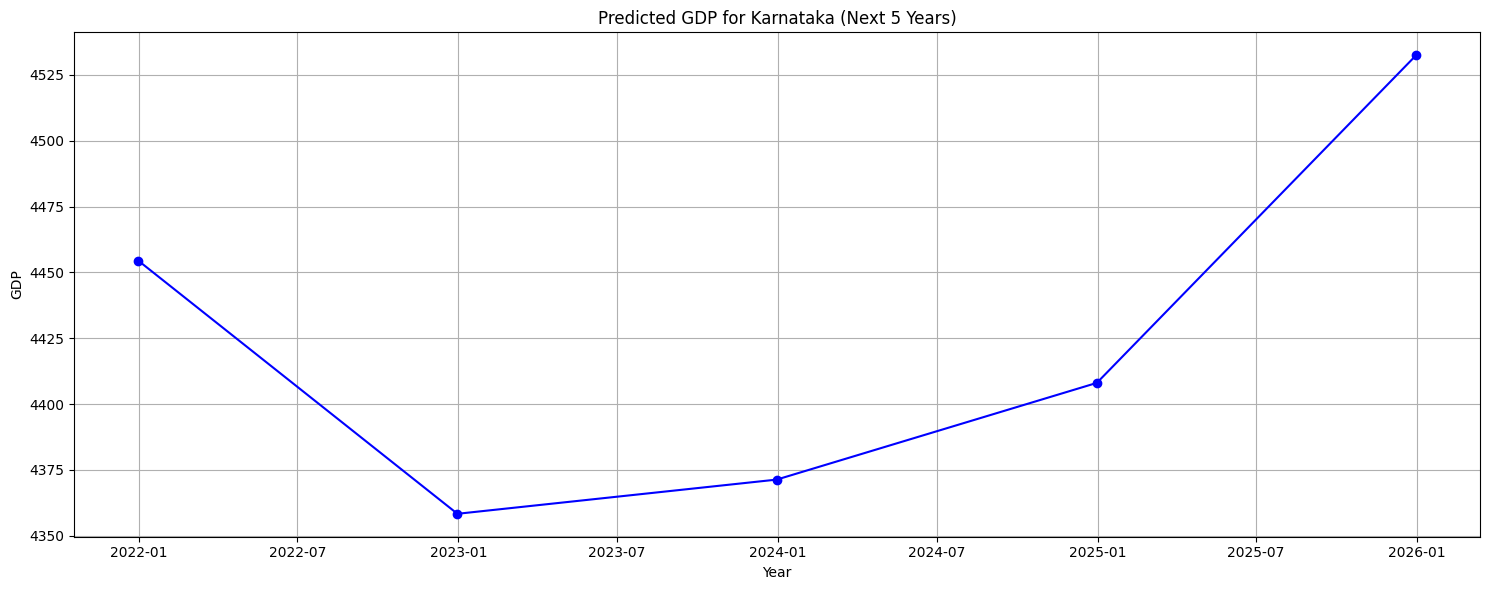

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = {
    'State/Union Territory': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'NCT of Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'ALL INDIA'],
    '2004': [5377.8, 135.0, 3470.7, 2472.2, 4383.3, 14.3, 145.2, 1238.2, 3023.0, 122.0, 492.2, 1677.0, 3547.0, 667.1, 1169.0, 2164.0, 435.9, 193.7, 104.1, 259.8, 6466.0, 65.7, 10437.0, 150.4, 21.6, 5062.2, 4223.2, 545.1, 9555.6, 572.0, 14884.8, 83131.7],
    '2005': [6555.7, 146.2, 3552.5, 3495.5, 5011.6, 24.0, 147.3, 1298.0, 3210.0, 112.1, 556.8, 1558.0, 5744.0, 629.9, 1656.3, 2695.0, 386.1, 151.9, 99.2, 263.1, 6859.0, 59.9, 10193.0, 153.0, 21.5, 5220.0, 5148.2, 552.9, 11133.7, 590.0, 14510.8, 91793.4],
    '2006': [6649.9, 146.2, 2916.0, 4989.3, 5041.4, 31.1, 130.3, 1390.0, 3371.0, 123.5, 554.0, 2967.8, 3446.0, 631.0, 1368.4, 2569.0, 386.1, 200.2, 29.5, 263.5, 6824.7, 59.9, 10138.0, 169.8, 21.5, 6610.6, 5222.1, 620.5, 11124.0, 556.0, 14745.9, 93355.3],
    '2007': [7463.2, 158.1, 3319.0, 4418.1, 5426.6, 31.4, 121.6, 1474.0, 3613.0, 121.5, 561.3, 3336.4, 3717.0, 528.5, 1461.9, 2996.0, 406.2, 200.0, 15.7, 290.6, 7540.7, 53.4, 10489.0, 259.6, 22.9, 5040.2, 5860.7, 624.6, 11780.0, 593.0, 14719.5, 96692.9],
    '2008': [7976.8, 163.9, 4008.5, 5590.3, 4391.8, 31.4, 123.3, 1303.0, 3298.0, 118.3, 563.1, 3420.2, 3802.0, 590.3, 1559.7, 2284.0, 397.0, 203.9, 46.0, 345.1, 6812.7, 50.8, 11000.0, 241.1, 21.7, 5182.7, 6264.2, 627.1, 13097.0, 582.0, 15037.3, 99182.5],
    '2009': [5902.7, 215.8, 4335.9, 3599.3, 4110.4, 19.3, 100.6, 1292.0, 3625.0, 105.9, 497.4, 1538.4, 3691.0, 598.3, 1260.6, 2183.0, 319.9, 206.7, 44.3, 240.3, 6917.5, 52.4, 11236.0, 228.3, 24.3, 5665.2, 4635.3, 640.0, 10807.1, 608.0, 14340.7, 89092.9],
    '2010': [7882.4, 234.0, 4736.6, 3102.1, 6159.0, 19.6, 115.0, 1496.6, 3472.0, 128.9, 507.7, 1110.0, 4188.0, 522.7, 1772.1, 2696.0, 521.7, 207.0, 47.2, 381.4, 6827.7, 52.0, 10837.0, 265.5, 21.0, 5792.4, 6535.6, 702.5, 11992.0, 550.4, 13045.9, 95979.8],
    '2011': [7746.2, 255.0, 4516.3, 7162.6, 6028.4, 19.8, 121.8, 1790.0, 3759.0, 131.6, 544.7, 3130.6, 3955.0, 569.0, 2227.3, 2841.0, 591.0, 216.5, 54.3, 382.4, 5807.0, 42.1, 10542.0, 253.4, 20.9, 7458.7, 5148.8, 718.3, 14022.0, 594.0, 14605.8, 105310.9],
    '2012': [6862.4, 263.0, 5128.5, 7529.3, 6608.8, 19.7, 122.8, 1541.0, 3976.0, 125.3, 818.1, 3164.9, 3364.0, 508.3, 2775.0, 3057.0, 257.6, 232.0, 30.5, 405.2, 7295.5, 46.5, 11374.0, 222.5, 21.3, 4049.9, 4647.6, 713.2, 14416.0, 579.8, 15023.7, 105231.6],
    '2013': [6969.7, 276.2, 4927.1, 5505.8, 6716.4, 29.6, 126.5, 1636.0, 3998.0, 120.8, 610.9, 2810.6, 3572.6, 509.2, 2844.8, 3120.0, 398.5, 273.9, 59.0, 429.6, 7613.4, 49.8, 11267.0, 312.6, 20.3, 5349.8, 5755.0, 711.8, 14636.0, 578.6, 15370.7, 106645.5],
    '2014': [7233.9, 285.0, 5222.7, 6356.7, 6322.1, 25.9, 120.5, 1830.9, 4006.0, 125.2, 517.2, 3361.9, 3541.0, 562.1, 3625.3, 2946.0, 334.1, 298.2, 60.7, 454.2, 8298.2, 52.7, 11107.0, 366.7, 20.1, 5727.8, 4440.8, 747.0, 12167.9, 603.7, 14677.2, 104798.5],
    '2015': [7488.7, 204.0, 5125.1, 6802.2, 5789.4, 17.3, 115.1, 1702.0, 4145.0, 129.9, 646.4, 2882.2, 3021.0, 549.3, 3546.7, 2593.0, 338.8, 301.1, 62.1, 318.8, 5875.4, 43.9, 11823.0, 369.8, 13.1, 7517.1, 3047.0, 794.8, 12501.0, 639.1, 15953.9, 104408.2],
    '2016': [7452.4, 220.0, 4727.4, 8239.3, 8048.4, 17.3, 113.2, 1930.0, 4453.0, 146.6, 572.2, 3841.8, 2604.8, 437.1, 4226.8, 3109.5, 430.4, 203.0, 61.5, 336.7, 8325.9, 52.2, 11586.2, 452.87, 19.7, 2369.4, 5173.4, 814.6, 13754.0, 630.0, 15302.5, 109698.4],
    '2017': [8166.2, 233.3, 5283.7, 8093.1, 4930.8, 16.8, 103.0, 1890.9, 4523.3, 114.79, 513.14, 4078.04, 3017.1, 521.3, 4123.9, 2730.8, 607.8, 304.6, 59.6, 349.6, 6551.3, 42.5, 13381.79, 450.87, 17.63, 6638.9, 6262.2, 812.1, 13274.0, 646.7, 14967.0, 112757.6],
    '2018': [8234.7, 240.0, 5220.6, 6155.5, 6526.9, 16.8, 98.8, 1912.1, 4516.1, 114.9, 615.8, 2893.9, 3431.0, 578.3, 4494.7, 3275.7, 401.6, 202.0, 60.0, 356.7, 7733.7, 63.3, 12821.6, 453.2, 17.2, 6130.9, 6670.0, 793.2, 15545.3, 617.6, 16242.2, 116477.8],
    '2019': [8658.9, 244.7, 4984.6, 6298.0, 6774.8, 16.8, 90.4, 1983.1, 4824.3, 143.8, 587.0, 3012.8, 3634.5, 605.6, 4778.2, 2897.6, 385.5, 303.4, 62.2, 363.3, 8360.4, 59.4, 11779.3, 480.5, 16.1, 7171.1, 7427.8, 810.2, 15517.8, 658.4, 15881.4, 118870.3],
    '2020': [7882.9, 247.1, 5214.8, 6747.0, 7161.2, 19.8, 87.3, 2145.7, 4424.9, 140.5, 581.5, 2752.9, 4291.8, 633.8, 4413.8, 3291.7, 602.2, 295.9, 60.9, 367.4, 8810.3, 50.0, 12783.7, 634.0, 16.2, 6881.2, 10217.1, 803.1, 15271.5, 714.9, 16524.4, 124368.3],
    '2021': [7763.6, 252.4, 4382.1, 7717.0, 8021.7, 19.0, 90.4, 2101.1, 4618.0, 167.5, 492.9, 2930.5, 4318.4, 487.0, 4814.9, 3598.1, 567.4, 297.3, 60.0, 150.7, 9290.8, 57.1, 12885.5, 478.6, 16.0, 7906.6, 12409.6, 811.0, 16728.7, 716.1, 129471.4, 129471.4]
}
# Convert the data dictionary to a DataFrame
df = pd.DataFrame(data)

# Set the 'State/Union Territory' column as index
df.set_index('State/Union Territory', inplace=True)

# Transpose the DataFrame
df = df.T

# Convert index to datetime
df.index = pd.to_datetime(df.index, format='%Y')

# Prepare the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Set sequence length
sequence_length = 5

# Create sequences for LSTM
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(sequence_length, df.shape[1])))
model.add(Dense(df.shape[1]))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=2)

# Make predictions for the next 5 years
future_years = 5
future_data = []

# Use the last sequence of actual data to predict from
last_sequence = scaled_data[-sequence_length:].reshape((1, sequence_length, df.shape[1]))

for i in range(future_years):
    prediction = model.predict(last_sequence)
    future_data.append(prediction)
    last_sequence = np.append(last_sequence[:, 1:, :], prediction.reshape(1, 1, df.shape[1]), axis=1)

# Inverse transform the predictions
future_data = np.array(future_data).reshape((future_years, df.shape[1]))
future_data = scaler.inverse_transform(future_data)

# Convert predictions to DataFrame
future_predictions_df = pd.DataFrame(future_data, columns=df.columns, index=pd.date_range(start=df.index[-1], periods=future_years, freq='Y'))

# Display the future predictions
print("Future Predictions:")
print(future_predictions_df)

# Plot the predicted data for a state
state_name = 'ALL INDIA'
plt.figure(figsize=(15, 6))
plt.plot(future_predictions_df.index, future_predictions_df[state_name], marker='o', color='b')
plt.title(f'Predicted GDP for {state_name} (Next 5 Years)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.tight_layout()
plt.show()

# Now, applying the code provided for predicting the next 5 years of RiceProduction
# Assuming 'data' contains the dataset for RiceProduction


In [ ]:

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss}')
print(f'Testing Loss: {test_loss}')

Training Loss: 0.01619134470820427
Testing Loss: 0.0940154567360878
